### Robustness metrics plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import seaborn as sns

In [2]:
df_colors = pd.read_csv('../data/icd_colors.csv')

In [23]:
df_icd = pd.read_csv("../data/AllWeightedMetrics_withDistanceInverse_ICD.csv")
df_icd.head()

,node,weighted_degree,closeness,betweenness,eigen_centrality,pagerank,community,age_group,metric_type,gender,net_type,weighted_density,average_path_length,modularity
0,A00,0.000000,NaN,0.0,8.277687e-18,0.000339,1,1,Cosine,Female,ICD,0.000208,134.277706,0.48799
1,A01,0.000000,NaN,0.0,8.277687e-18,0.000339,2,1,Cosine,Female,ICD,0.000208,134.277706,0.48799
2,A02,0.230919,0.009838,0.0,1.131570e-01,0.001255,3,1,Cosine,Female,ICD,0.000208,134.277706,0.48799
3,A03,0.000000,NaN,0.0,8.277687e-18,0.000339,4,1,Cosine,Female,ICD,0.000208,134.277706,0.48799
4,A04,0.401107,0.009217,0.0,1.758062e-01,0.001967,3,1,Cosine,Female,ICD,0.000208,134.277706,0.48799


In [16]:
metric_types = df_icd['metric_type'].unique()

plots_type = ['average_path_length','betweenness','closeness','modularity','weighted_degree','weighted_density']
print('plot_types   ', plots_type)
print('metric types:', metric_types)

plot_types    ['average_path_length', 'betweenness', 'closeness', 'modularity', 'weighted_degree', 'weighted_density']
metric types: ['Cosine' 'OR' 'Jaccard' 'JointPrev' 'Kulczynski' 'Lift' 'Phi' 'RelRisk']


In [24]:
filtered_df = df_icd[(df_icd['gender'] == 'Male') & (df_icd['metric_type'] == 'Jaccard')]
print(filtered_df.shape)
filtered_df.head()


(8640, 14)


,node,weighted_degree,closeness,betweenness,eigen_centrality,pagerank,community,age_group,metric_type,gender,net_type,weighted_density,average_path_length,modularity
34560,A00,0.000000,NaN,0.0,2.966231e-17,0.000310,1,1,Jaccard,Male,ICD,0.000141,1124.49707,0.49768
34561,A01,0.000000,NaN,0.0,2.966231e-17,0.000310,2,1,Jaccard,Male,ICD,0.000141,1124.49707,0.49768
34562,A02,0.091952,0.001475,0.0,8.144928e-02,0.001131,3,1,Jaccard,Male,ICD,0.000141,1124.49707,0.49768
34563,A03,0.000000,NaN,0.0,2.966231e-17,0.000310,4,1,Jaccard,Male,ICD,0.000141,1124.49707,0.49768
34564,A04,0.186537,0.001533,0.0,1.475245e-01,0.002005,3,1,Jaccard,Male,ICD,0.000141,1124.49707,0.49768


In [6]:
print(results)

NameError: name 'results' is not defined

In [25]:
male_results = {key:{} for key in plots_type}
female_results = {key:{} for key in plots_type}

for p_type in plots_type:
    for metric in metric_types:
        
        filtered_df_male = df_icd[(df_icd['gender'] == 'Male') & (df_icd['metric_type'] == metric)]
        filtered_df_female = df_icd[(df_icd['gender'] == 'Female') & (df_icd['metric_type'] == metric)]

        grouped_data_male = filtered_df_male.groupby('age_group')[p_type].mean().reset_index()
        grouped_data_female = filtered_df_female.groupby('age_group')[p_type].mean().reset_index()

        male_results[p_type][metric] = grouped_data_male[p_type]
        female_results[p_type][metric] = grouped_data_female[p_type]        

        

In [26]:
plots_type = ['betweenness','modularity']


### Plot data

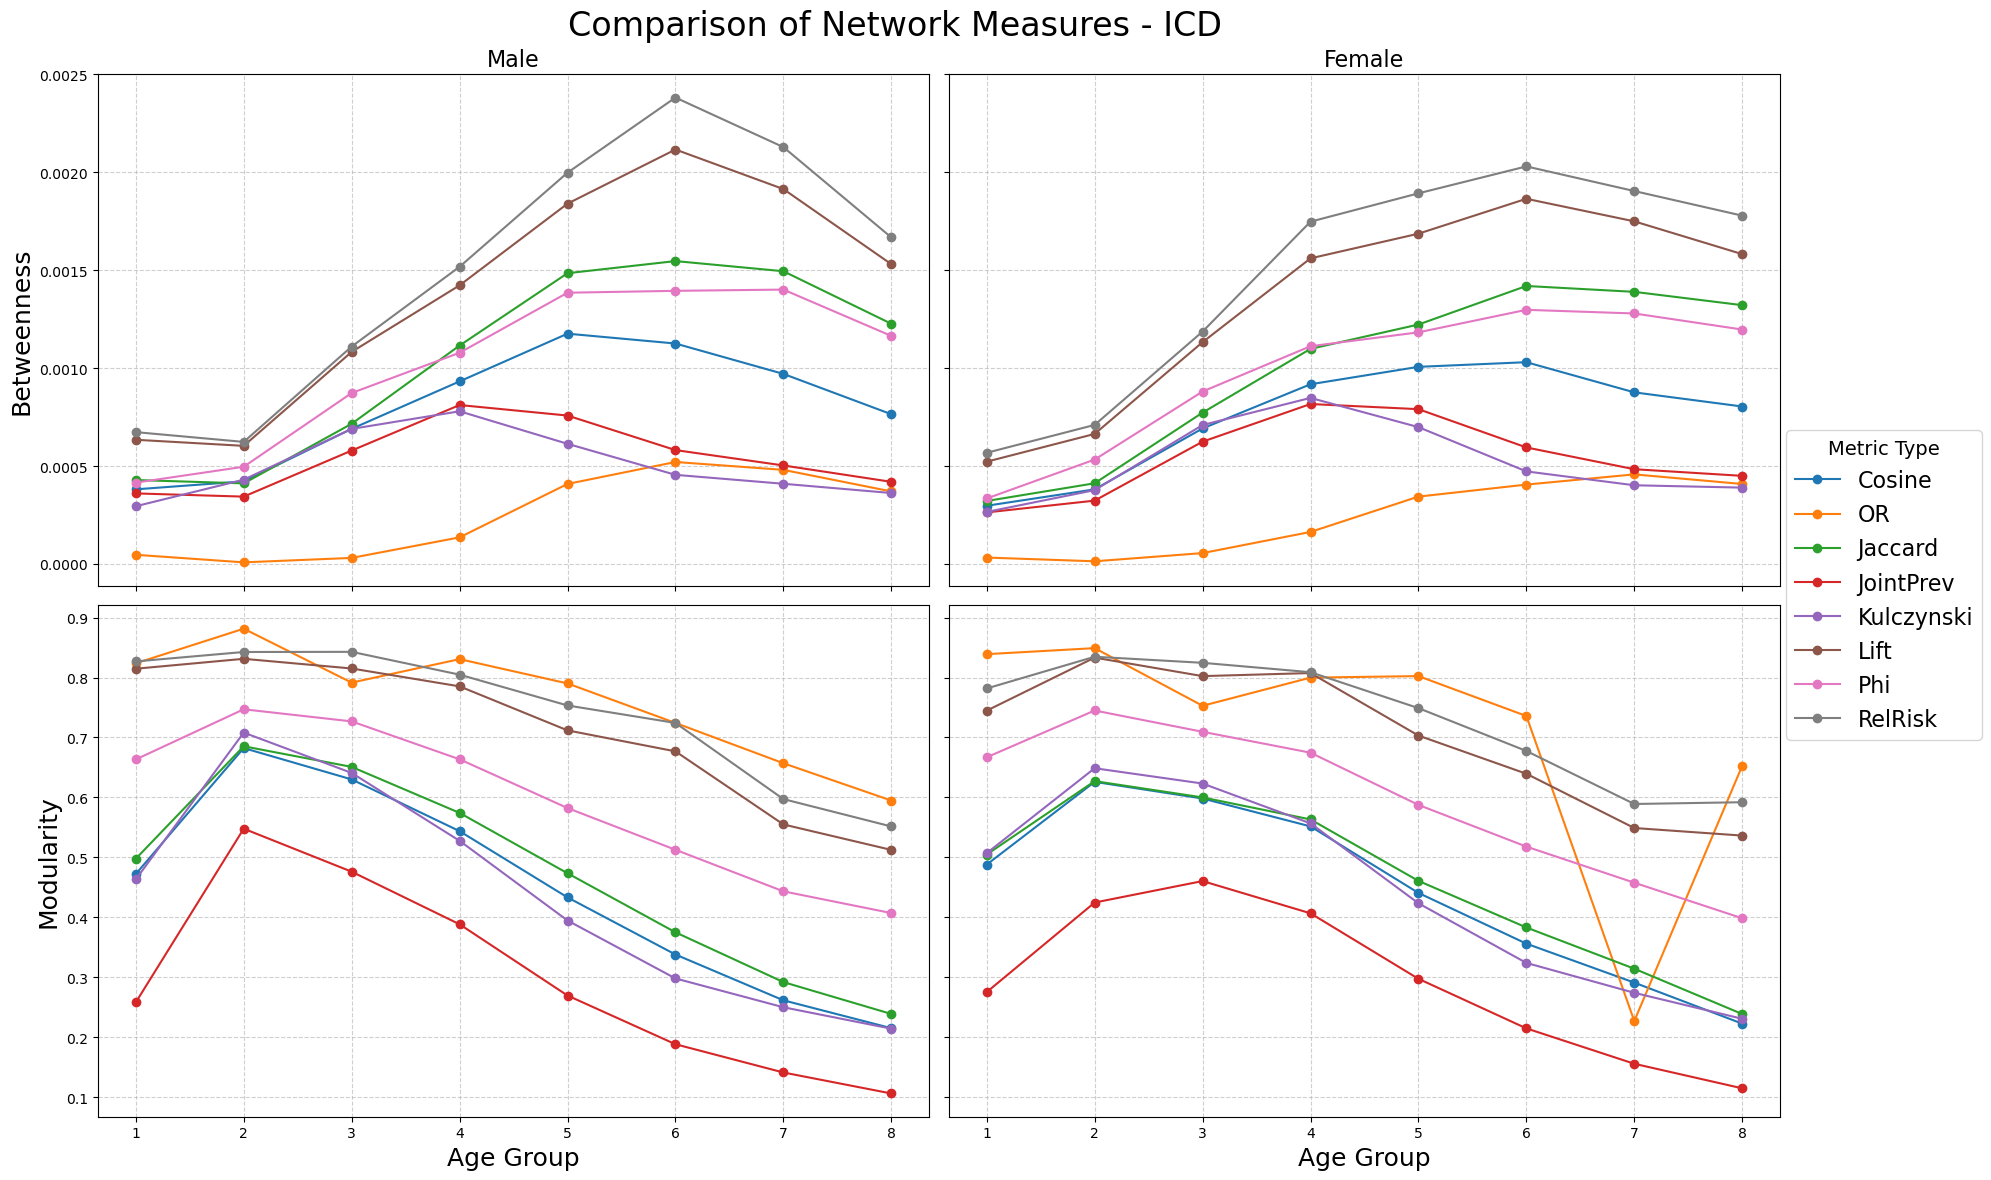

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharex=True, sharey='row')
genders = ['Male','Female']
x_data = sorted(df_icd['age_group'].unique()) if 'age_group' in df_icd else []

# --- 3. Loop Through Rows (plots_type) and Columns (gender) ---
for i, p_type in enumerate(plots_type):
    for j, gender in enumerate(genders):
        # Select the correct subplot from the 2D axes array.
        ax = axes[i, j]

        # --- 4. Loop Through Each Metric to Draw Lines ---
        for m_type in metric_types:
            # Filter data for the specific plot type, gender, and metric type.
            filtered_df = df_icd[(df_icd['gender'] == gender) & (df_icd['metric_type'] == m_type)]
            
            # Group by age group and calculate the mean for the measure.
            # Reindex to ensure all age groups are present, filling missing ones with NaN.
            grouped_data = filtered_df.groupby('age_group')[p_type].mean().reindex(x_data)
            
            # Plot the data.
            ax.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', label=m_type)

        # --- 5. Customize Each Subplot ---
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Set the column title (Male/Female) only for the top row.
        if i == 0:
            ax.set_title(f'{gender}', fontsize=16)
            
        # Set the row label (plot type) only for the first column.
        if j == 0:
            ax.set_ylabel(p_type.replace('_', ' ').title(), fontsize=18)

# --- 6. Final Adjustments and Display ---
# Set shared x-axis label for the bottom row.
for ax in axes[1, :]:
    ax.set_xlabel('Age Group', fontsize=18)

# Create a single, shared legend for the entire figure to avoid clutter.
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Metric Type', loc='center right', bbox_to_anchor=(1.11, 0.5), fontsize=16, title_fontsize=14)

# Add a single, overarching title for the entire figure.
fig.suptitle('Comparison of Network Measures - ICD', fontsize=24, y=0.98)

# Adjust the layout to prevent titles and labels from overlapping.
# The `right` parameter makes space for the shared legend.
#plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.tight_layout()

# Save the figure to a file.
plt.savefig('2x2_Betweenness_Modularity_ICD.png', dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()